In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
%matplotlib inline

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/대여소정보.csv', encoding='utf-8')

# 자치구별 대여소 평균 거리 계산(degree -> km)
df_gu = df.groupby('자치구').apply(lambda x: 
                (((x['위도'].diff() * 111.139)**2 + (x['경도'].diff() * 111.139)**2)**0.5).mean(skipna=True))
df_gu = df_gu.reset_index(name='평균거리(km)')

# 결과 확인
print(df_gu)

# 자치구의 평균거리의 평균 계산
gu_mean = df_gu.groupby('자치구')['평균거리(km)'].mean()
mean_distance = gu_mean.mean()
print('총 평균 거리=',mean_distance)


     자치구  평균거리(km)
0    강남구  2.671598
1    강동구  2.198429
2    강북구  1.661970
3    강서구  1.881578
4    관악구  2.453315
5    광진구  1.850691
6    구로구  2.117447
7    금천구  1.503659
8    노원구  2.309102
9    도봉구  1.988551
10  동대문구  1.958035
11   동작구  2.534004
12   마포구  1.928877
13  서대문구  2.052608
14   서초구  2.626592
15   성동구  1.888530
16   성북구  1.959179
17   송파구  2.725035
18   양천구  2.411800
19  영등포구  1.562849
20   용산구  2.117275
21   은평구  2.484097
22   종로구  1.538009
23    중구  1.653543
24   중랑구  2.034964
총 평균 거리= 2.08446951574621


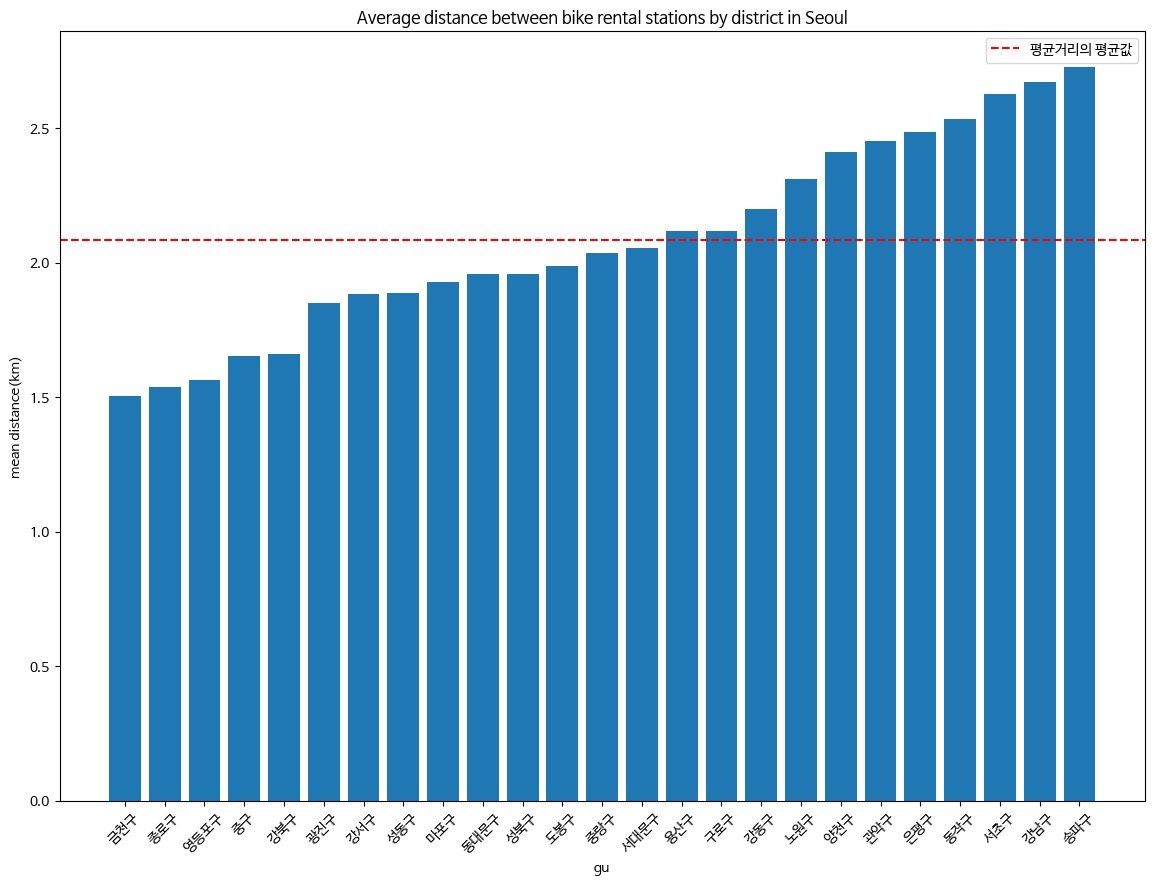

<Figure size 640x480 with 0 Axes>

In [7]:
# 시각화
sorted_df_gu = df_gu.sort_values('평균거리(km)')
plt.figure(figsize=(14, 10))
plt.bar(sorted_df_gu['자치구'], sorted_df_gu['평균거리(km)'])
plt.title('Average distance between bike rental stations by district in Seoul')
plt.xlabel('gu')
plt.ylabel('mean distance(km)')
plt.xticks(rotation=45)

# 평균거리의 평균값을 빨간색 점선으로 추가
mean_distance = gu_mean.mean()
plt.axhline(mean_distance, color='r', linestyle='--', label='평균거리의 평균값')

# 범례 추가
plt.legend()

plt.show()

plt.savefig('mean distance.png')